In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from matplotlib import font_manager
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [0]:
moons = make_moons(n_samples=200, noise=0.2, random_state=0)
X = moons[0]
y = moons[1]

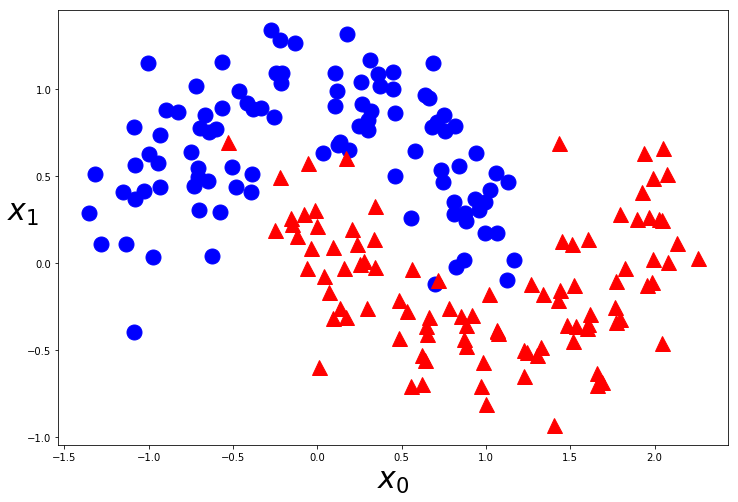

In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, margin=0.3):
    _x1 = np.linspace(X[:, 0].min()-margin, X[:, 0].max()+margin, 100)
    _x2 = np.linspace(X[:, 1].min()-margin, X[:, 1].max()+margin, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
def plot_datasets(X, y):
    plt.plot(X[0:, 0][y==0], X[:, 1][y==0],"bo", ms=15)
    plt.plot(X[0:, 0][y==1], X[:, 1][y==1],"r^", ms=15)
    plt.xlabel("$x_0$",fontsize=30)
    plt.ylabel("$x_1$",fontsize=30,rotation=0)
    
plt.figure(figsize=(12, 8))
plot_datasets(X, y)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree_clf = DecisionTreeClassifier().fit(X_train,y_train)

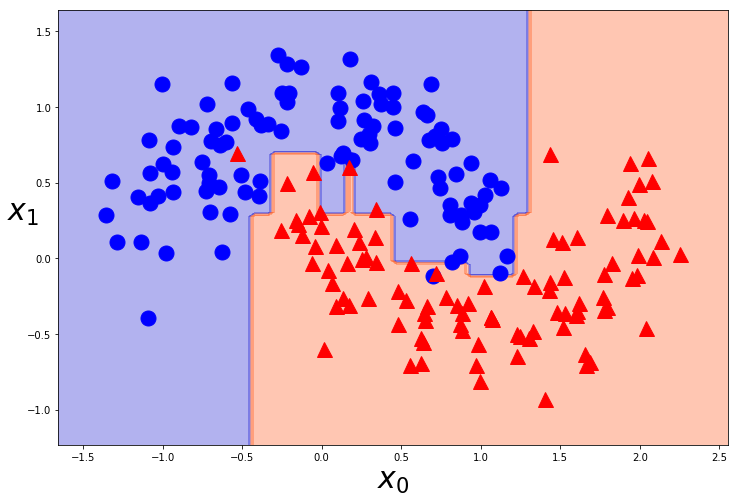

In [11]:
plt.figure(figsize=(12, 8))
plot_decision_boundary(tree_clf, X, y)
plot_datasets(X, y)
plt.show()

In [0]:
# ランダムフォレスト

from sklearn.ensemble import RandomForestClassifier

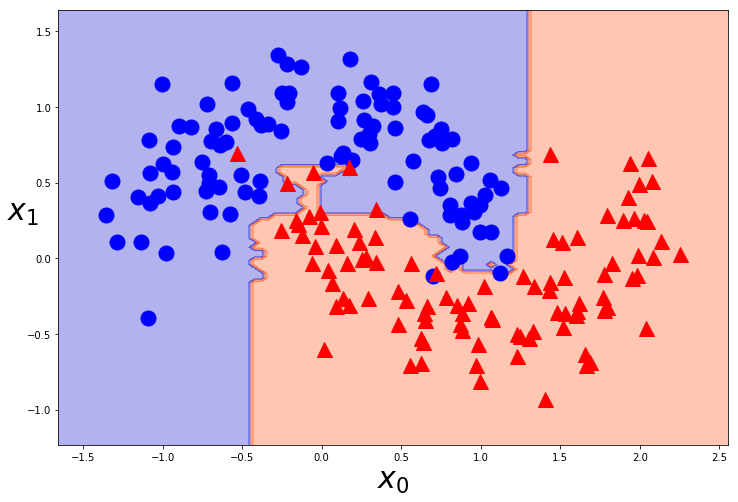

In [24]:
random_forest =  RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)  # estimators何個の木を組み合わせる

plt.figure(figsize=(12, 8))
plot_decision_boundary(random_forest, X, y)
plot_datasets(X, y)
plt.show()

In [0]:
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target


In [62]:
# ランダムフォレスト

random_forest_iris = RandomForestClassifier(random_state=0).fit(X_iris, y_iris)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [63]:
random_forest_iris.feature_importances_   # RandomForestClassifier特徴量を見る方法

array([0.11896532, 0.0231668 , 0.36804744, 0.48982043])

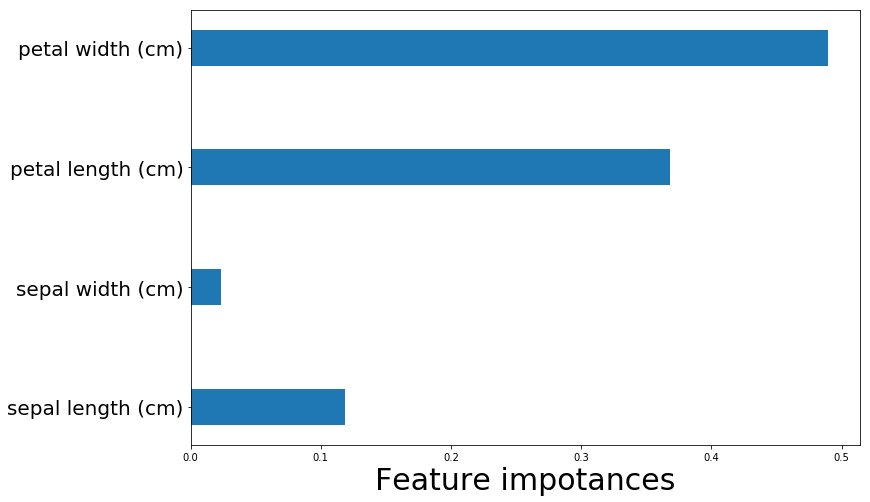

In [64]:
# 分類基準に重要かわかる(petal　WIDTHが重要）

plt.figure(figsize=(12, 8))
plt.barh(range(iris.data.shape[1]),random_forest_iris.feature_importances_, height=0.3)
plt.yticks(range(iris.data.shape[1]),iris.feature_names, fontsize=20)
plt.xlabel("Feature impotances", fontsize=30)
plt.show()

In [0]:
import pandas as pd

In [71]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [72]:
#　ファイル情報
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
# 欠損値の埋め込み(ageには平均値を埋める　emberked 

df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) 

In [76]:
#　ファイル情報
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
#　文字から数値に変換

from sklearn.preprocessing import LabelEncoder

cat_features  = ['Sex', 'Embarked']

for col in cat_features:
    lb1 = LabelEncoder()
    df[col] = lb1.fit_transform(list(df[col].values))

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [0]:
X = df.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin'])
y = df['Survived']

In [90]:
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [92]:
tree = DecisionTreeClassifier().fit(X_train,y_train)
tree.score(X_test, y_test)

0.757847533632287

In [0]:
#　ランダムフォレスト

rnd_forest = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0).fit(X_train, y_train)

In [96]:
rnd_forest.score(X_test, y_test)

0.8295964125560538

In [99]:
# 提出用ファイル作成

test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
# 欠損値の埋め込み(ageには平均値を埋める　emberked 

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean()) 

In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
#　文字から数値に変換


for col in cat_features:
    lb1 = LabelEncoder()
    test_df[col] = lb1.fit_transform(list(test_df[col].values))

In [105]:
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [0]:
X_pred = test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
ID   = test_df['PassengerId']


In [113]:
prediction = rnd_forest.predict(X_pred)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [125]:
submisson = pd.DataFrame({
    'PassengerId': ID,
    'Survived': prediction
})
submisson.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [0]:
submisson.to_csv('submisson.csv',index=False)